In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import functions

In [37]:
def prepare_for_plot(dfcount, column, landcover, new_name):
    if column =='count':
        melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name=new_name) 
        melted = melted.rename(columns={'D_year': 'year', 'D_month': 'month'})
    if column == 'volume':
        melted = pd.melt(dfcount, id_vars=['year', 'month'], var_name='elevation', value_name=new_name)
    
    melted['elevation'] = melted['elevation'].astype(str).str.extract(r'^(\d+)')[0].astype(int)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # melted = melted.sort_values('elevation_bin')
    melted['date_id'] = melted['year'].astype(str) + "_" + melted['month'].astype(str) + "_" + melted['elevation'].astype(str)
    melted = melted.sort_values('date_id')
    melted['landcover'] = landcover
    return melted 




def count_mean_per_month(df):
    dfcount_mean = df.groupby('month')['dfcount'].mean().reset_index()
    dfcount_mean = dfcount_mean.rename(columns={'dfcount': 'dfcount_month_mean'})
    
    df = df.merge(dfcount_mean, on='month', how='left')
    return(df)




In [38]:
output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1 = prepare_for_plot(TL1, 'volume', 'landcover 1', 'Qstl')#[['Q100', 'date_id']]
TL2 = prepare_for_plot(TL2, 'volume', 'landcover 2', 'Qstl')#[['Q100', 'date_id']]
TL3 = prepare_for_plot(TL3, 'volume', 'landcover 3', 'Qstl')#[['Q100', 'date_id']]
TL4 = prepare_for_plot(TL4, 'volume', 'landcover 4', 'Qstl')#[['Q100', 'date_id']]
TL5 = prepare_for_plot(TL5, 'volume', 'landcover 5', 'Qstl')#[['Q100', 'date_id']]


# ------ dfcount - total count of sediments per month

TL1count = pd.read_csv(output_path + f'langtang/langtang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2count = pd.read_csv(output_path + f'langtang/langtang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3count = pd.read_csv(output_path + f'langtang/langtang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4count = pd.read_csv(output_path + f'langtang/langtang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5count = pd.read_csv(output_path + f'langtang/langtang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1count = prepare_for_plot(TL1count, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2count = prepare_for_plot(TL2count, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3count = prepare_for_plot(TL3count, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4count = prepare_for_plot(TL4count, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5count = prepare_for_plot(TL5count, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1 = TL1.merge(TL1count, on = 'date_id')
TL2 = TL2.merge(TL2count, on = 'date_id')
TL3 = TL3.merge(TL3count, on = 'date_id')
TL4 = TL4.merge(TL4count, on = 'date_id')
TL5 = TL5.merge(TL5count, on = 'date_id')




TL1 = count_mean_per_month(TL1)
TL2 = count_mean_per_month(TL2)
TL3 = count_mean_per_month(TL3)
TL4 = count_mean_per_month(TL4)
TL5 = count_mean_per_month(TL5)

In [39]:
# MUSTANG

output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1m = prepare_for_plot(TL1m, 'volume', 'landcover 1', 'Qstl')
TL2m = prepare_for_plot(TL2m, 'volume', 'landcover 2', 'Qstl')
TL3m = prepare_for_plot(TL3m, 'volume', 'landcover 3', 'Qstl')
TL4m = prepare_for_plot(TL4m, 'volume', 'landcover 4', 'Qstl')
TL5m = prepare_for_plot(TL5m, 'volume', 'landcover 5', 'Qstl')



# ------ dfcount - total count of sediments per month

TL1countm = pd.read_csv(output_path + f'mustang/mustang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2countm = pd.read_csv(output_path + f'mustang/mustang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3countm = pd.read_csv(output_path + f'mustang/mustang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4countm = pd.read_csv(output_path + f'mustang/mustang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5countm = pd.read_csv(output_path + f'mustang/mustang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1countm = prepare_for_plot(TL1countm, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2countm = prepare_for_plot(TL2countm, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3countm = prepare_for_plot(TL3countm, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4countm = prepare_for_plot(TL4countm, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5countm = prepare_for_plot(TL5countm, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1m = TL1m.merge(TL1countm, on = 'date_id')
TL2m = TL2m.merge(TL2countm, on = 'date_id')
TL3m = TL3m.merge(TL3countm, on = 'date_id')
TL4m = TL4m.merge(TL4countm, on = 'date_id')
TL5m = TL5m.merge(TL5countm, on = 'date_id')




TL1m = count_mean_per_month(TL1m)
TL2m = count_mean_per_month(TL2m)
TL3m = count_mean_per_month(TL3m)
TL4m = count_mean_per_month(TL4m)
TL5m = count_mean_per_month(TL5m)

In [40]:
TL5m



,year,month,elevation,Qstl,elevation_bin,date_id,landcover,dfcount,dfcount_month_mean
0,1989,10,2546,0.0,2500 - 3000,1989_10_2546,landcover 5,0,0.007089
1,1989,10,2571,0.0,2500 - 3000,1989_10_2571,landcover 5,0,0.007089
2,1989,10,2779,0.0,2500 - 3000,1989_10_2779,landcover 5,0,0.007089
3,1989,10,2886,0.0,2500 - 3000,1989_10_2886,landcover 5,0,0.007089
4,1989,10,2981,0.0,2500 - 3000,1989_10_2981,landcover 5,0,0.007089
...,...,...,...,...,...,...,...,...,...
86541,2022,9,5895,0.0,5500 - 6000,2022_9_5895,landcover 5,0,0.109687
86542,2022,9,5908,0.0,5500 - 6000,2022_9_5908,landcover 5,0,0.109687
86543,2022,9,5909,0.0,5500 - 6000,2022_9_5909,landcover 5,0,0.109687
86544,2022,9,5960,0.0,5500 - 6000,2022_9_5960,landcover 5,0,0.109687


In [ ]:
fig = plt.figure(figsize=(20, 7), layout='tight')

mosaic = fig.subplot_mosaic('''
                            klmno
                            abcde
                            abcde
                            abcde
                            abcde
                            abcde
                            abcde
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ''')

# LANGTAG - volume
sns.barplot(data = TL1, x = 'month', y = 'Qstl', ax = mosaic['a'])#, legend = True,  hue ='dfcount_mean', palette = palette)
sns.barplot(data = TL2, x = 'month', y = 'Qstl', ax = mosaic['b'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL3, x = 'month', y = 'Qstl', ax = mosaic['c'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL4, x = 'month', y = 'Qstl', ax = mosaic['d'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL5, x = 'month', y = 'Qstl', ax = mosaic['e'])#, legend = True,  hue = 'dfcount_mean',  palette = palette)


# MUSTANG - volume
sns.barplot(data = TL1m, x = 'month', y = 'Qstl', ax = mosaic['A'])#, legend = True,)
sns.barplot(data = TL2m, x = 'month', y = 'Qstl', ax = mosaic['B'])#, legend = False)
sns.barplot(data = TL3m, x = 'month', y = 'Qstl', ax = mosaic['C'])#, legend = False)
sns.barplot(data = TL4m, x = 'month', y = 'Qstl', ax = mosaic['D'])#, legend = False)
sns.barplot(data = TL5m, x = 'month', y = 'Qstl', ax = mosaic['E'])#, legend = True,)



# Secondary axis
axa = mosaic['a'].twinx()
axb = mosaic['b'].twinx()
axc = mosaic['c'].twinx()
axd = mosaic['d'].twinx()
axe = mosaic['e'].twinx()

axA = mosaic['A'].twinx()
axB = mosaic['B'].twinx()
axC = mosaic['C'].twinx()
axD = mosaic['D'].twinx()
axE = mosaic['E'].twinx()


# # LANGTAG - count
# sns.lineplot(data = TL1, x = 'month', y = 'dfcount_month_mean', ax = axa, legend = False, color = 'pink')
# sns.lineplot(data = TL2, x = 'month', y = 'dfcount_month_mean', ax = axb, legend = False, color = 'pink')
# sns.lineplot(data = TL3, x = 'month', y = 'dfcount_month_mean', ax = axc, legend = False, color = 'pink')
# sns.lineplot(data = TL4, x = 'month', y = 'dfcount_month_mean', ax = axd, legend = False, color = 'pink')
# sns.lineplot(data = TL5, x = 'month', y = 'dfcount_month_mean', ax = axe, legend = False, color = 'pink')


# # MUSTANG - count
# sns.lineplot(data = TL1m, x = 'month', y = 'dfcount_month_mean', ax = axA, legend = False)
# sns.lineplot(data = TL2m, x = 'month', y = 'dfcount_month_mean', ax = axB, legend = False)
# sns.lineplot(data = TL3m, x = 'month', y = 'dfcount_month_mean', ax = axC, legend = False)
# sns.lineplot(data = TL4m, x = 'month', y = 'dfcount_month_mean', ax = axD, legend = False)
# sns.lineplot(data = TL5m, x = 'month', y = 'dfcount_month_mean', ax = axE, legend = False)




# LANGTAG - count
sns.lineplot(data = TL1, x = 'month', y = 'dfcount', ax = axa,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL2, x = 'month', y = 'dfcount', ax = axb,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL3, x = 'month', y = 'dfcount', ax = axc,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL4, x = 'month', y = 'dfcount', ax = axd,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL5, x = 'month', y = 'dfcount', ax = axe,  color = 'darkorange')#, color = 'pink')


# MUSTANG - count
sns.lineplot(data = TL1m, x = 'month', y = 'dfcount', ax = axA, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL2m, x = 'month', y = 'dfcount', ax = axB, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL3m, x = 'month', y = 'dfcount', ax = axC, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL4m, x = 'month', y = 'dfcount', ax = axD, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL5m, x = 'month', y = 'dfcount', ax = axE, color = 'darkorange')#, errorbar = 'se',  legend = False)





# LAYOUT 
# Desired color for secondary axes
color = 'darkorange'
# List of all twin axes
empty_axes = [axa, axb, axc, axd, axA, axB, axC, axD]

for ax in empty_axes:
    ax.tick_params(axis='y', colors=color)
    ax.set_yticklabels([])
    ax.set_ylabel('')

orange_axes = [axe, axE]


# Loop to style the twin axes
for ax in orange_axes:
    ax.tick_params(axis='y', colors=color)           # Tick color
    # ax.spines['right'].set_color(color)              # Spine color
    ax.yaxis.label.set_color(color)                  # Axis label color (if used)


# # THIS IS AXIS PART 


for key in ['b', 'c', 'd', 'e', 'B', 'C', 'D', 'E']:
    mosaic[key].set_yticklabels([])
    mosaic[key].set_ylabel('')

for key in ['a', 'b', 'c', 'd', 'e']:
    mosaic[key].set_xticklabels([])
    mosaic[key].set_xlabel('')


# # ORANGE PART

for ax in [axa, axb, axc, axd, axe]:
    ax.set_ylim(0, 8)

for ax in [axA, axB, axC, axD, axE]:
    ax.set_ylim(0, 1.2)

# BARS

for key in ['a', 'b', 'c', 'd', 'e']:
    mosaic[key].set_ylim(0, 120)

for key in ['A', 'B', 'C', 'D', 'E']:
    mosaic[key].set_ylim(0, 20)


# ADD LANDCOVER 
# Iterate over the bar row and create the proportional bars

# Define color proportions for each panel (Green, Yellow, Gray)
shares = [
    (40, 40, 20),  # First bar: 40% green (veg) , 30% grey (bedrock), 30% blue (glacier)
    (40, 50, 10),
    (50, 40, 10),
    (40, 60, 00),
    (60, 40, 00),
]

for i, key in enumerate("klmno"):
    bar_ax = mosaic[key]  # Select the correct subplot for the bar

    # Remove ticks, labels, and spines
    bar_ax.set_xticks([])
    bar_ax.set_yticks([])
    bar_ax.set_frame_on(False)

    # Extract proportions (must sum to 100%)
    p1, p2, p3 = shares[i]  # Green, Yellow, Gray

    # Convert percentages to width (normalized to 1)
    p1 /= 100
    p2 /= 100
    p3 /= 100

    # Plot the three segments
    bar_ax.barh(0, p1, height=4, color='green', align='center', alpha=0.8)
    bar_ax.barh(0, p2, height=4, color='lightgray', left=p1, align='center', hatch = '//')
    bar_ax.barh(0, p3, height=4, color='lightblue', left=p1 + p2, align='center')
    bar_ax.set_xlim(0, 1)



outpath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/output/testplots/'
# plt.savefig(outpath + 'monthly_volume_and_count.png', dpi = 300, bbox_inches = 'tight')

In [78]:
all_Qstl.max()

1191.7774727966323

<AxesSubplot:xlabel='month', ylabel='dfcount'>

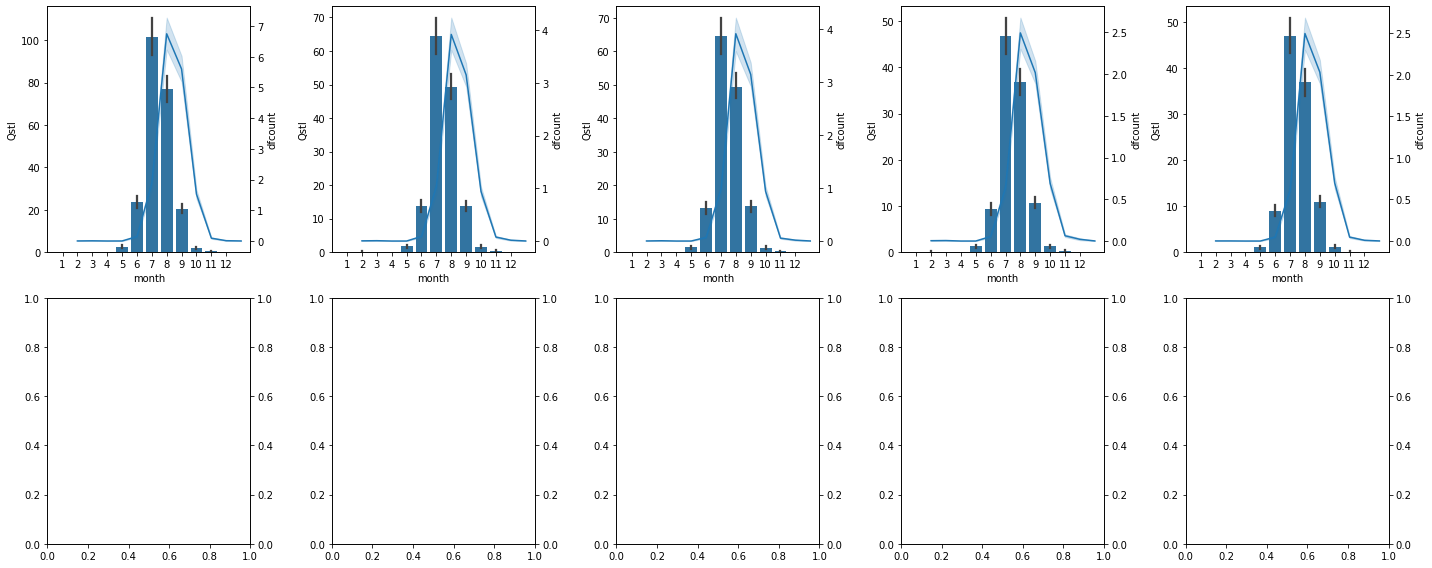

In [21]:
fig = plt.figure(figsize=(20, 8), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ABCDE
                            ''')

# Create secondary axis
axa = mosaic['a'].twinx()
axb = mosaic['b'].twinx()
axc = mosaic['c'].twinx()
axd = mosaic['d'].twinx()
axe = mosaic['e'].twinx()


axA = mosaic['A'].twinx()
axB = mosaic['B'].twinx()
axC = mosaic['C'].twinx()
axD = mosaic['D'].twinx()
axE = mosaic['E'].twinx()


# palette = 'viridis'


# SEDIMENTS LANGTANG
sns.barplot(data = TL1, x = 'month', y = 'Qstl', ax = mosaic['a'], legend = True)
sns.barplot(data = TL2, x = 'month', y = 'Qstl', ax = mosaic['b'], legend = False)
sns.barplot(data = TL3, x = 'month', y = 'Qstl', ax = mosaic['c'], legend = False)
sns.barplot(data = TL4, x = 'month', y = 'Qstl', ax = mosaic['d'], legend = False)
sns.barplot(data = TL5, x = 'month', y = 'Qstl', ax = mosaic['e'], legend = False)


# hydrology
# -- precipitation LANGTANG
sns.lineplot(data = TL1, x = 'month', y = 'dfcount', ax = axa, legend = False)
sns.lineplot(data = TL2, x = 'month', y = 'dfcount', ax = axb, legend = False)
sns.lineplot(data = TL3, x = 'month', y = 'dfcount', ax = axc, legend = False)
sns.lineplot(data = TL4, x = 'month', y = 'dfcount', ax = axd, legend = False)
sns.lineplot(data = TL5, x = 'month', y = 'dfcount', ax = axe, legend = False)



# sns.lineplot(data = snowmelt1, x = 'month', y = 'snowmelt', ax = axa, legend = False)
# sns.lineplot(data = snowmelt2, x = 'month', y = 'snowmelt', ax = axb, legend = False)
# sns.lineplot(data = snowmelt3, x = 'month', y = 'snowmelt', ax = axc, legend = False)
# sns.lineplot(data = snowmelt4, x = 'month', y = 'snowmelt', ax = axd, legend = False)
# sns.lineplot(data = snowmelt5, x = 'month', y = 'snowmelt', ax = axe, legend = False)

# sns.lineplot(data = glmelt1, x = 'month', y = 'glmelt', ax = axa, legend = False)
# sns.lineplot(data = glmelt2, x = 'month', y = 'glmelt', ax = axb, legend = False)
# sns.lineplot(data = glmelt3, x = 'month', y = 'glmelt', ax = axc, legend = False)



# # ---------------------------------

# # SEDIMENTS MUSTANG
# sns.barplot(data = TL1m, x = 'month', y = 'Qstl', ax = mosaic['A'], legend = True, errorbar = 'ci')
# sns.barplot(data = TL2m, x = 'month', y = 'Qstl', ax = mosaic['B'], legend = False, alpha = 0.7)
# sns.barplot(data = TL3m, x = 'month', y = 'Qstl', ax = mosaic['C'], legend = False)
# sns.barplot(data = TL4m, x = 'month', y = 'Qstl', ax = mosaic['D'], legend = False)
# sns.barplot(data = TL5m, x = 'month', y = 'Qstl', ax = mosaic['E'], legend = False)





# # -- precipitation MUSTANG
# sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axA, legend = True)
# sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axB, legend = False)
# sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axC, legend = False)
# sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axD, legend = False)
# sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axE, legend = False)



# sns.lineplot(data = snowmelt1m, x = 'month', y = 'snowmelt', ax = axA, legend = False)
# sns.lineplot(data = snowmelt2m, x = 'month', y = 'snowmelt', ax = axB, legend = False)
# sns.lineplot(data = snowmelt3m, x = 'month', y = 'snowmelt', ax = axC, legend = False)
# sns.lineplot(data = snowmelt4m, x = 'month', y = 'snowmelt', ax = axD, legend = False)
# sns.lineplot(data = snowmelt5m, x = 'month', y = 'snowmelt', ax = axE, legend = False)

# sns.lineplot(data = glmelt1m, x = 'month', y = 'glmelt', ax = axA, legend = False)
# sns.lineplot(data = glmelt2m, x = 'month', y = 'glmelt', ax = axB, legend = False)
# sns.lineplot(data = glmelt3m, x = 'month', y = 'glmelt', ax = axC, legend = False)





<AxesSubplot:label='e', xlabel='month', ylabel='dfcount'>

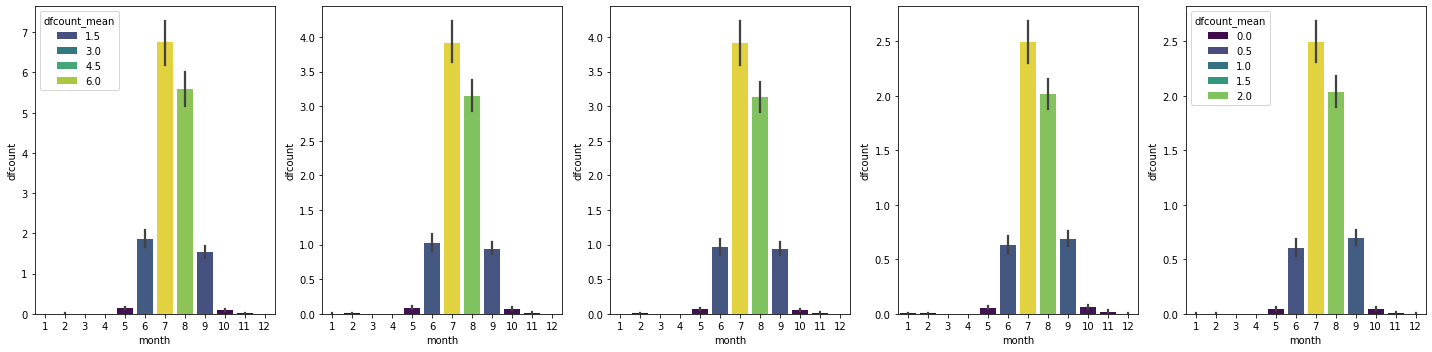

In [8]:
fig = plt.figure(figsize=(20, 5), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

palette = 'viridis'

sns.barplot(data = TL1, x = 'month', y = 'dfcount', ax = mosaic['a'], legend = True, hue ='dfcount_mean', palette = palette)
sns.barplot(data = TL2, x = 'month', y = 'dfcount', ax = mosaic['b'], legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL3, x = 'month', y = 'dfcount', ax = mosaic['c'], legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL4, x = 'month', y = 'dfcount', ax = mosaic['d'], legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL5, x = 'month', y = 'dfcount', ax = mosaic['e'], legend = True,  hue = 'dfcount_mean',  palette = palette)



In [9]:
# hydrology INPUT
hydro_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/hydro/'

# ------  

Pr1 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_Pr_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
Pr1 = prepare_for_plot(Pr1, 'volume', 'landcover 1', 'Pr')#[['Q100', 'date_id']]


# hydrology OUTPUT
snowmelt1 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_snowmelt_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt2 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_snowmelt_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt3 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_snowmelt_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt4 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_snowmelt_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt5 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_snowmelt_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)

snowmelt1 = prepare_for_plot(snowmelt1, 'volume', 'landcover 1', 'snowmelt')
snowmelt2 = prepare_for_plot(snowmelt2, 'volume', 'landcover 2', 'snowmelt')
snowmelt3 = prepare_for_plot(snowmelt3, 'volume', 'landcover 3', 'snowmelt')
snowmelt4 = prepare_for_plot(snowmelt4, 'volume', 'landcover 4', 'snowmelt')
snowmelt5 = prepare_for_plot(snowmelt5, 'volume', 'landcover 5', 'snowmelt')


snowmelt1['snowmelt'] = snowmelt1.snowmelt * -1
snowmelt2['snowmelt'] = snowmelt2.snowmelt * -1
snowmelt3['snowmelt'] = snowmelt3.snowmelt * -1
snowmelt4['snowmelt'] = snowmelt4.snowmelt * -1
snowmelt5['snowmelt'] = snowmelt5.snowmelt * -1


glmelt1 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_glacier_melt_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
glmelt2 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_glacier_melt_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
glmelt3 = pd.read_csv(hydro_path + f'langtang/langtang_monthly_sum_elevation_glacier_melt_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)

glmelt1 = prepare_for_plot(glmelt1, 'volume', 'landcover 1', 'glmelt')
glmelt2 = prepare_for_plot(glmelt2, 'volume', 'landcover 2', 'glmelt')
glmelt3 = prepare_for_plot(glmelt3, 'volume', 'landcover 3', 'glmelt')




# ---------- MUSTANG

# ------  

Pr1m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_Pr_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
Pr1m = prepare_for_plot(Pr1m, 'volume', 'landcover 1', 'Pr')#[['Q100', 'date_id']]


# hydrology OUTPUT
snowmelt1m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_snowmelt_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt2m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_snowmelt_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt3m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_snowmelt_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt4m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_snowmelt_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
snowmelt5m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_snowmelt_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)

snowmelt1m = prepare_for_plot(snowmelt1m, 'volume', 'landcover 1', 'snowmelt')
snowmelt2m = prepare_for_plot(snowmelt2m, 'volume', 'landcover 2', 'snowmelt')
snowmelt3m = prepare_for_plot(snowmelt3m, 'volume', 'landcover 3', 'snowmelt')
snowmelt4m = prepare_for_plot(snowmelt4m, 'volume', 'landcover 4', 'snowmelt')
snowmelt5m = prepare_for_plot(snowmelt5m, 'volume', 'landcover 5', 'snowmelt')


snowmelt1m['snowmelt'] = snowmelt1m.snowmelt * -1
snowmelt2m['snowmelt'] = snowmelt2m.snowmelt * -1
snowmelt3m['snowmelt'] = snowmelt3m.snowmelt * -1
snowmelt4m['snowmelt'] = snowmelt4m.snowmelt * -1
snowmelt5m['snowmelt'] = snowmelt5m.snowmelt * -1


glmelt1m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_glacier_melt_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
glmelt2m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_glacier_melt_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
glmelt3m = pd.read_csv(hydro_path + f'mustang/mustang_monthly_sum_elevation_glacier_melt_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)

glmelt1m = prepare_for_plot(glmelt1m, 'volume', 'landcover 1', 'glmelt')
glmelt2m = prepare_for_plot(glmelt2m, 'volume', 'landcover 2', 'glmelt')
glmelt3m = prepare_for_plot(glmelt3m, 'volume', 'landcover 3', 'glmelt')







<AxesSubplot:xlabel='month', ylabel='Pr'>

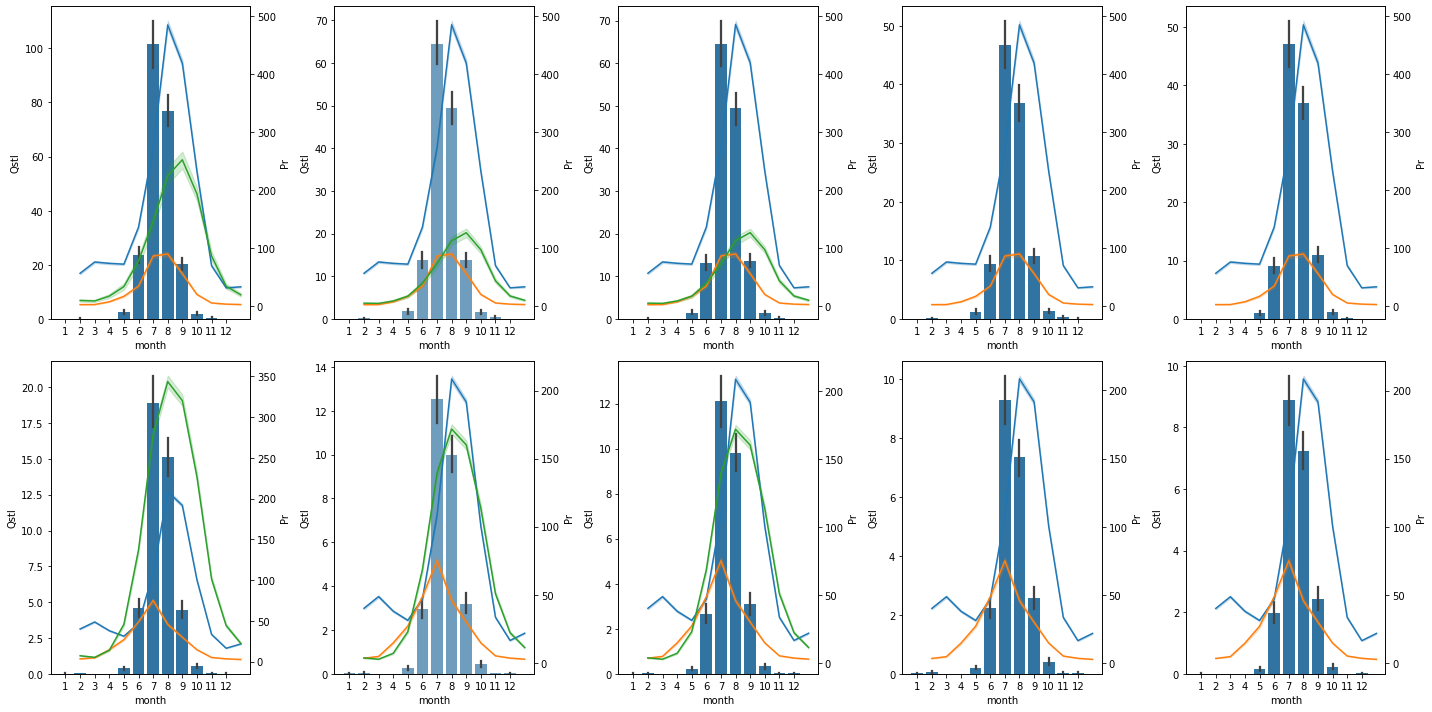

In [10]:
fig = plt.figure(figsize=(20, 10), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ABCDE
                            ''')

# Create secondary axis
axa = mosaic['a'].twinx()
axb = mosaic['b'].twinx()
axc = mosaic['c'].twinx()
axd = mosaic['d'].twinx()
axe = mosaic['e'].twinx()


axA = mosaic['A'].twinx()
axB = mosaic['B'].twinx()
axC = mosaic['C'].twinx()
axD = mosaic['D'].twinx()
axE = mosaic['E'].twinx()


palette = 'viridis'


# SEDIMENTS LANGTANG
sns.barplot(data = TL1, x = 'month', y = 'Qstl', ax = mosaic['a'], legend = True, errorbar = 'ci')
sns.barplot(data = TL2, x = 'month', y = 'Qstl', ax = mosaic['b'], legend = False, alpha = 0.7)
sns.barplot(data = TL3, x = 'month', y = 'Qstl', ax = mosaic['c'], legend = False)
sns.barplot(data = TL4, x = 'month', y = 'Qstl', ax = mosaic['d'], legend = False)
sns.barplot(data = TL5, x = 'month', y = 'Qstl', ax = mosaic['e'], legend = False)


# hydrology
# -- precipitation LANGTANG
sns.lineplot(data = Pr1, x = 'month', y = 'Pr', ax = axa, legend = False)
sns.lineplot(data = Pr1, x = 'month', y = 'Pr', ax = axb, legend = False)
sns.lineplot(data = Pr1, x = 'month', y = 'Pr', ax = axc, legend = False)
sns.lineplot(data = Pr1, x = 'month', y = 'Pr', ax = axd, legend = False)
sns.lineplot(data = Pr1, x = 'month', y = 'Pr', ax = axe, legend = False)



sns.lineplot(data = snowmelt1, x = 'month', y = 'snowmelt', ax = axa, legend = False)
sns.lineplot(data = snowmelt2, x = 'month', y = 'snowmelt', ax = axb, legend = False)
sns.lineplot(data = snowmelt3, x = 'month', y = 'snowmelt', ax = axc, legend = False)
sns.lineplot(data = snowmelt4, x = 'month', y = 'snowmelt', ax = axd, legend = False)
sns.lineplot(data = snowmelt5, x = 'month', y = 'snowmelt', ax = axe, legend = False)

sns.lineplot(data = glmelt1, x = 'month', y = 'glmelt', ax = axa, legend = False)
sns.lineplot(data = glmelt2, x = 'month', y = 'glmelt', ax = axb, legend = False)
sns.lineplot(data = glmelt3, x = 'month', y = 'glmelt', ax = axc, legend = False)



# ---------------------------------

# SEDIMENTS MUSTANG
sns.barplot(data = TL1m, x = 'month', y = 'Qstl', ax = mosaic['A'], legend = True, errorbar = 'ci')
sns.barplot(data = TL2m, x = 'month', y = 'Qstl', ax = mosaic['B'], legend = False, alpha = 0.7)
sns.barplot(data = TL3m, x = 'month', y = 'Qstl', ax = mosaic['C'], legend = False)
sns.barplot(data = TL4m, x = 'month', y = 'Qstl', ax = mosaic['D'], legend = False)
sns.barplot(data = TL5m, x = 'month', y = 'Qstl', ax = mosaic['E'], legend = False)





# -- precipitation MUSTANG
sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axA, legend = True)
sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axB, legend = False)
sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axC, legend = False)
sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axD, legend = False)
sns.lineplot(data = Pr1m, x = 'month', y = 'Pr', ax = axE, legend = False)



sns.lineplot(data = snowmelt1m, x = 'month', y = 'snowmelt', ax = axA, legend = False)
sns.lineplot(data = snowmelt2m, x = 'month', y = 'snowmelt', ax = axB, legend = False)
sns.lineplot(data = snowmelt3m, x = 'month', y = 'snowmelt', ax = axC, legend = False)
sns.lineplot(data = snowmelt4m, x = 'month', y = 'snowmelt', ax = axD, legend = False)
sns.lineplot(data = snowmelt5m, x = 'month', y = 'snowmelt', ax = axE, legend = False)

sns.lineplot(data = glmelt1m, x = 'month', y = 'glmelt', ax = axA, legend = False)
sns.lineplot(data = glmelt2m, x = 'month', y = 'glmelt', ax = axB, legend = False)
sns.lineplot(data = glmelt3m, x = 'month', y = 'glmelt', ax = axC, legend = False)





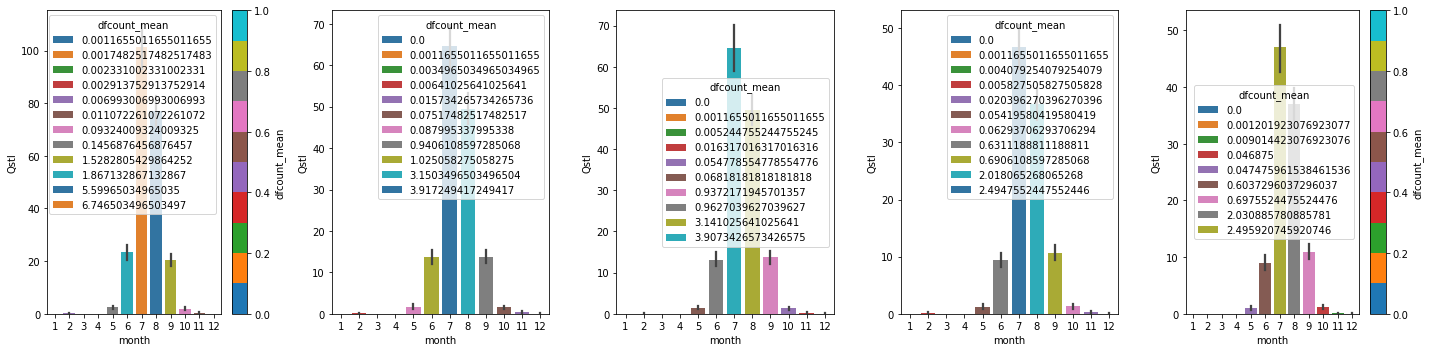

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd



fig = plt.figure(figsize=(20, 5), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')


# Define the palette
cmap = "tab10"





# Plot using the same hue scale for all subplots
sns.barplot(data=TL1, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['a'], palette=cmap, dodge=False)
sns.barplot(data=TL2, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['b'], palette=cmap, dodge=False)
sns.barplot(data=TL3, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['c'], palette=cmap, dodge=False)
sns.barplot(data=TL4, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['d'], palette=cmap, dodge=False)
sns.barplot(data=TL5, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['e'], palette=cmap, dodge=False)

# Add a colorbar using fig (not ax)
sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
fig.colorbar(sm, ax=mosaic['a'], orientation='vertical', label='dfcount_mean')


sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
fig.colorbar(sm, ax=mosaic['e'], orientation='vertical', label='dfcount_mean')


<AxesSubplot:label='e', xlabel='month', ylabel='Qstl'>

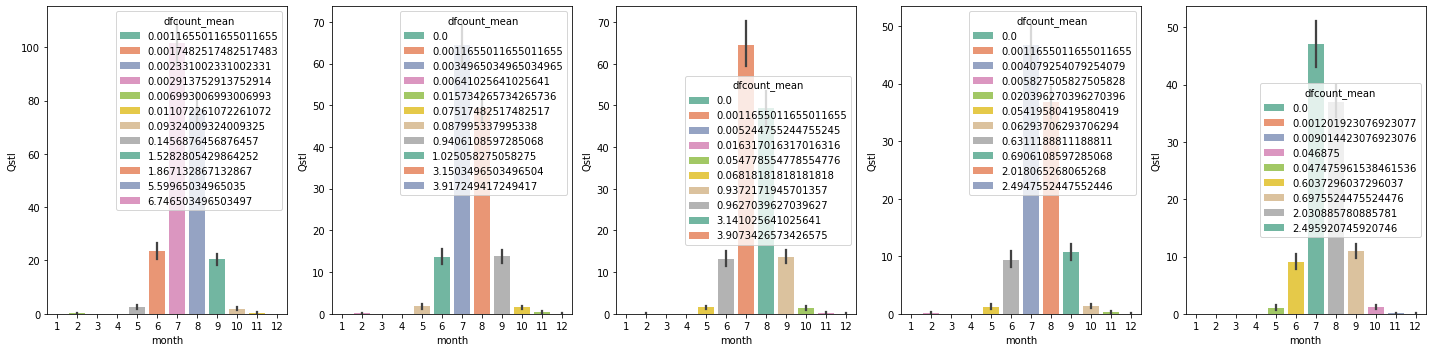

In [12]:
fig = plt.figure(figsize=(20, 5), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

cmap = 'Set2'
# Plot using the same hue scale for all subplots
sns.barplot(data=TL1, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['a'], palette=cmap, dodge=False)
sns.barplot(data=TL2, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['b'], palette=cmap, dodge=False)
sns.barplot(data=TL3, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['c'], palette=cmap, dodge=False)
sns.barplot(data=TL4, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['d'], palette=cmap, dodge=False)
sns.barplot(data=TL5, x='month', y='Qstl', hue='dfcount_mean', ax=mosaic['e'], palette=cmap, dodge=False)


/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_16761/1890645240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TL1, x='month', y='dfcount_mean', ax=mosaic['a'], palette=cmap, dodge=False)
/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_16761/1890645240.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TL2, x='month', y='dfcount_mean', ax=mosaic['b'], palette=cmap, dodge=False)
/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_16761/1890645240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barpl

<AxesSubplot:label='e', xlabel='month', ylabel='dfcount_mean'>

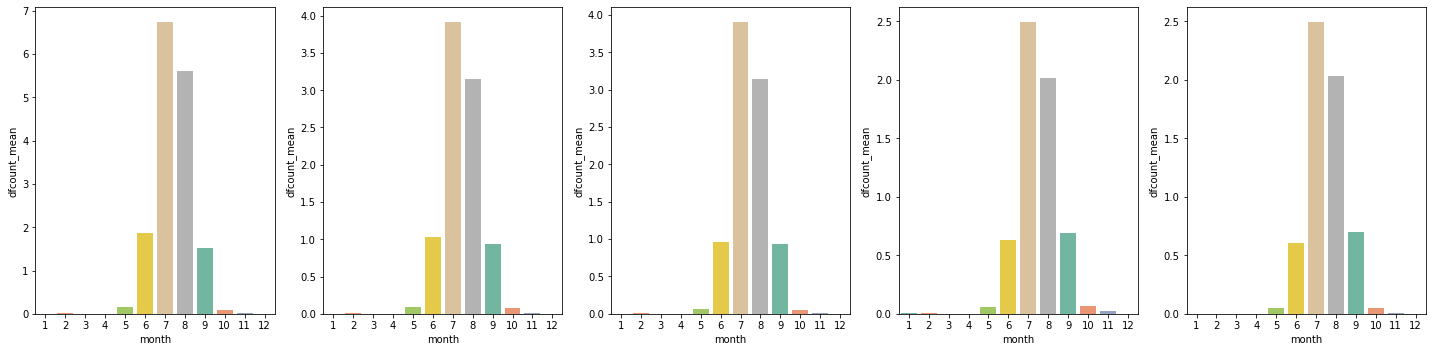

In [13]:
fig = plt.figure(figsize=(20, 5), layout='tight')

mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

cmap = 'Set2'
# Plot using the same hue scale for all subplots
sns.barplot(data=TL1, x='month', y='dfcount_mean', ax=mosaic['a'], palette=cmap, dodge=False)
sns.barplot(data=TL2, x='month', y='dfcount_mean', ax=mosaic['b'], palette=cmap, dodge=False)
sns.barplot(data=TL3, x='month', y='dfcount_mean', ax=mosaic['c'], palette=cmap, dodge=False)
sns.barplot(data=TL4, x='month', y='dfcount_mean', ax=mosaic['d'], palette=cmap, dodge=False)
sns.barplot(data=TL5, x='month', y='dfcount_mean', ax=mosaic['e'], palette=cmap, dodge=False)
